Oriya Villarreal

Homework 2

13 October 2022

**Problem 1: Using Observations of Peak Flow Data for Sauk River to Investigate Whether a Change in Flood Statistics Occurred Around 1977**

Part A: Descriptive Plots that Communicate a Change in Peak Flow for the Sauk River Around 1977

In [ ]:
# Step 1: Import packages needed for dataset
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Step 2: Filepath and filename for Sauk River dataset  
sauk_data_file = 'Sauk_peak_WY1929_2021.xlsx'

sauk_data = pd.read_excel(sauk_data_file)

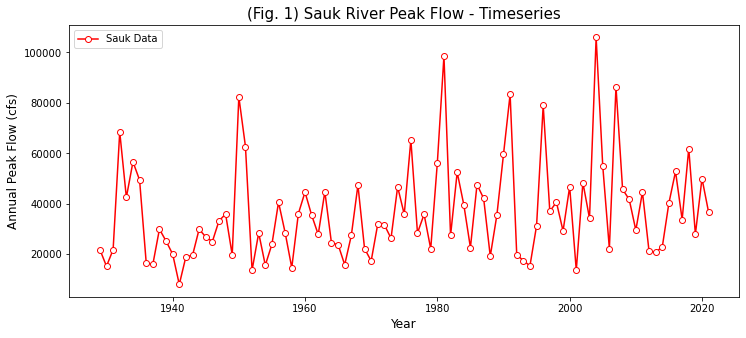

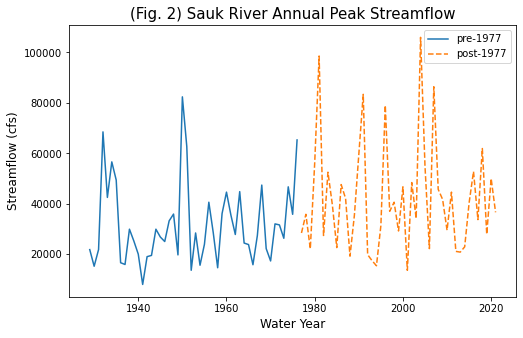

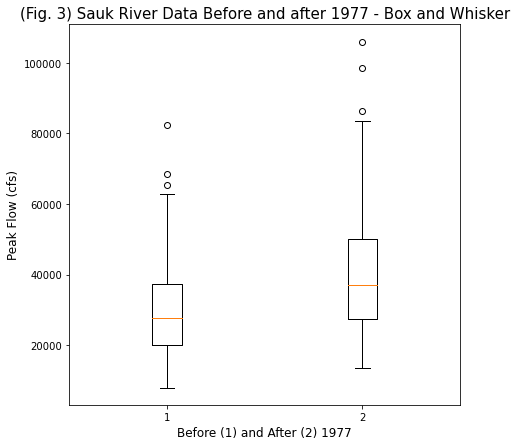

In [72]:
# Step 3: Plots for Part A

# Timeseries (Figure 1) and Box Plot (Figure 3) are from Homework 1
# Time Periods Plot was created for this assignment (Figure 2)
# Figure 2 is included to visually support analysis of Figure 1

# Step 3a: Figure 1 - Timeseries
plt.figure(figsize=(12,5))
# Plot Sauk River Peak Flow Data
plt.plot(sauk_data['water year'], # x value
         sauk_data['peak value (cfs)'], # y value
         linestyle='-', 
         color='red', 
         marker='o', 
         markerfacecolor='white',  
         markeredgecolor='red',
        label='Sauk Data') 
# Labels
plt.xlabel('Year', fontsize=12)
plt.ylabel('Annual Peak Flow (cfs)', fontsize=12)
plt.title('(Fig. 1) Sauk River Peak Flow - Timeseries', fontsize=15)
# Legend info:
plt.legend(loc='upper left');
plt.show()


# Step 3b: Figure 2 - Two Time Periods Plot
# Divide the data: before 1977 and after/including 1977) 
sauk_before = sauk_data[ sauk_data['water year'] < 1977 ]
sauk_after = sauk_data[ sauk_data['water year'] >= 1977 ]

# Plot the data for two time periods
fig, ax = plt.subplots(figsize=(8,5))
sauk_before.plot(x='water year', y='peak value (cfs)', 
                 ax=ax, linestyle='-', label='pre-1977')
sauk_after.plot(x='water year', y='peak value (cfs)', 
                ax=ax, linestyle='--', label='post-1977')
# Labels
ax.set_xlabel('Water Year', fontsize=12);
ax.set_ylabel('Streamflow (cfs)', fontsize=12);
ax.set_title('(Fig. 2) Sauk River Annual Peak Streamflow', fontsize=15);


# Step 3c: Figure 3 - Box and Whiskers Plot
def cunnane_quantile(df, column_name):
    ranked_df = df.sort_values(by=[column_name]).reset_index()
    ranked_df['cunnane_plotting_position'] = ((ranked_df.index + 1) - (2/5)) /  (ranked_df[column_name].count() + (1/5))
    
    return ranked_df

ranked_df_before=cunnane_quantile(sauk_before, 'peak value (cfs)')
ranked_df_after=cunnane_quantile(sauk_after, 'peak value (cfs)')

# Create Figure
fig, ax = plt.subplots(figsize=(7,7))
sauk_before=Sauk_data.query("`water year` < 1977")
sauk_after= Sauk_data.query("`water year` >= 1977")
plt.boxplot([sauk_before['peak value (cfs)'], sauk_after['peak value (cfs)']])
plt.title('(Fig. 3) Sauk River Data Before and after 1977 - Box and Whisker', fontsize=15)
plt.xlabel('Before (1) and After (2) 1977', fontsize=12) 
plt.ylabel('Peak Flow (cfs)', fontsize=12)

# Box and Whiskers Legend Info
plt.show()


*Analysis*: 

The Sauk River experienced a decline in its annual peak flow around 1977. In 1976, the annual peak flow was measured to be approximately 65,000 cfs. This variable declined by almost 1/2 at approximately 30,000 cfs in 1977 (Figure 1). Decline in annual peak flow between 1976 and 1977 may have been influenced by a PDO shift in 1977. The PDO shift caused above average temperatures in the Pacific Northwest, likely leading to frequent drought events thay may have impacted peak flows.

Despite the decline in peak flow between 1976 and 1977, the central value for annual peak flow of The Sauk River after 1977 is greater than the central value for annual peak flow before 1977 (Figure 3). This figure communicates that the concentration of the response variable (peak flow) changed among the explanatory variables (Water Years Before and After 1977).

Part B: Two-Sample Test for a Change in Mean

In [78]:
# Step 1
# Establish Null Hypothesis, Create an Alternative Hypothesis
# Set Significance Level to 5%

Significance Level:
$\alpha$ at 5%.

**Null Hypothesis**: Peak flows before 1977 ($\bar{X}_1$) are drawn from the same distribution as the peak flows after 1977 ($\bar{X}_2$). The distribution means of the two time periods are equal and the difference between the two means is equal to zero.

$H_0: \bar{X}_1 = \bar{X}_2$

$H_0: \bar{X}_2 - \bar{X}_1$ = 0

**Alternative Hypothesis**: Mean of the distribution for the period after 1977 is greater than that of the period before 1977. The difference between the two means has changed in either direction :

$H_1: \bar{X}_2 > \bar{X}_1$

Equations above are related to a One-Sided Test. For this assignment, the z-test will be used because the sample size is > 30 and we want to approximate the normal distribution.

Equation for z-score: $\displaystyle Z = \frac{ (\bar{X}_2 - \bar{X}_1) - \mu _{0} } { s_{1,2} }$

$s_{1,2}$ is the pooled standard deviation
$s_1$, $s_2$ and $n_1$, $n_2$ are the two standard deviations and sample sizes.

$s_{1,2} = \displaystyle\sqrt{ \displaystyle\frac{s^2_1}{n_1} + \displaystyle\frac{s^2_2}{n_2} }$


Calculations for z-distribution, pooled standard deviation, and z-score are displayed in the next steps.


In [82]:
# Step 2: Confirm sample size n > 30 for both periods

n = len(sauk_before['peak value (cfs)'])
print(n)

m = len(sauk_after['peak value (cfs)'])
print(m)

48
45


Since both sample sizes are greater than 30, we can continue to calculate z-score.

In [84]:
# Step 3: Set the value for alpha to 0.05 for a confidence of 0.95
alpha = 0.05
conf = 1 - alpha

In [86]:
# Step 4: Find the value in z-distribution that corresponds with 0.95 confidence in CDF
z_alpha = stats.norm.ppf(conf)
print("z_alpha = {}".format(z_alpha)) 

z_alpha = 1.6448536269514722


Equation for computing pooled standard deviation:

$s_{1,2}$ is the pooled standard deviation
$s_1$, $s_2$ and $n_1$, $n_2$ are the two standard deviations and sample sizes.

$s_{1,2} = \displaystyle\sqrt{ \displaystyle\frac{s^2_1}{n_1} + \displaystyle\frac{s^2_2}{n_2} }$

In this test, sample size before 1977 = 48 and sample size after 1977 =45

In [88]:
# Step 5: Compute the pooled standard deviation
pooled_sd = np.sqrt( sauk_before['peak value (cfs)'].std(ddof=1)**2 / n + sauk_after['peak value (cfs)'].std(ddof=1)**2 / m )

In [89]:
# Step 6: Compute z-score
# hypothesis = no change
mu_0 = 0

# compute z-score
zscore = (sauk_after['peak value (cfs)'].mean() - sauk_before['peak value (cfs)'].mean() - mu_0)/pooled_sd

print("z-score = {}".format( np.round(zscore,2) )) 

z-score = 2.59


Z-score can be used to compute a p-value. This is done by locating the z-score on the standard normal distribution CDF

In [90]:
# Step 7: Compute p-value
pvalue = 1 - stats.norm.cdf(zscore)
print("p = {}".format( np.round(pvalue,3) ))

p = 0.005


Plotting computed data:

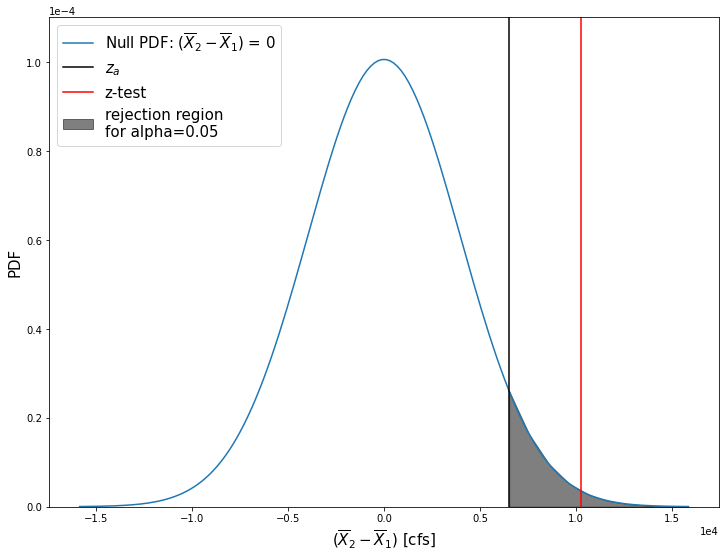

In [103]:
# Step 8: Plotting z-distribution
# Set z values between -4 and 4
# Scale our values by the pooled standard deviation
z = np.linspace(-4, 4, num=160) * pooled_sd

# Create the plot figure frame
plt.figure(figsize=(12,9))

# z-distribution info
plt.plot(z, stats.norm.pdf(z, 0, pooled_sd), label='Null PDF: ($\overline{X}_2 - \overline{X}_1$) = 0')

# Include line at the z-alpha value and shade the rejection region
plt.axvline(z_alpha*pooled_sd, color='black', linestyle='-', label='$z_{a}$')
shade = np.linspace(z_alpha*pooled_sd, np.max(z), 10)
plt.fill_between(shade, stats.norm.pdf(shade, 0, pooled_sd) ,  color='k', alpha=0.5, label='rejection region\nfor alpha={}'.format(np.round(1-conf,2)))


plt.axvline(zscore*pooled_sd, color='red', linestyle='-', label='z-test')
plt.xlabel('($\overline{X}_2 - \overline{X}_1$) [cfs]', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.ylim(0, 11e-5)
plt.legend(loc='best', fontsize=15);

*Analysis*: The shaded rejection region on the graph represents the area that rejects the null hypothesis. If computed p-value falls within this shaded region, then the null hypothesis will be rejected. The computed p-value for this test is less than the value of alpha (p-value = 0.005) which means we can reject the null hypothesis. The z-test and z-distribution is done when sample sizes exceed n = 30. In this case, the z-distribution is appropriate because the sample size exceeds n = 30 before and after 1977.

Next, we will compute the p-value for when the null hypothesis changes.

New null hypothesis: The mean of the second period is 1.25 times the mean of the first period.

In [104]:
# Step 9: Compute new z-score and p-value
# hypothesizing a 25% change
mu_0 = 0.25 * sauk_before['peak value (cfs)'].mean()

# compute z-score
zscore = (sauk_after['peak value (cfs)'].mean() - sauk_before['peak value (cfs)'].mean() - mu_0)/pooled_sd
print("z-score = {}".format( np.round(zscore,2) )) 

pvalue = 1 - stats.norm.cdf(zscore)
print("p = {}".format( np.round(pvalue,3) ))

z-score = 0.6
p = 0.276


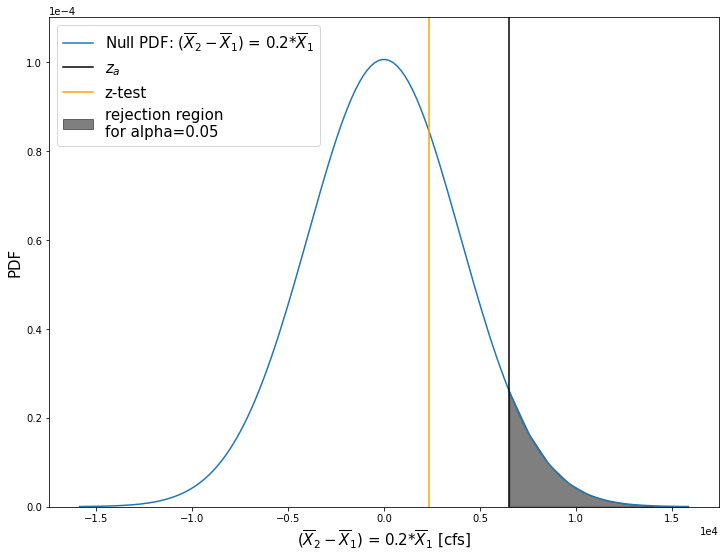

In [106]:
# Create z values
z = np.linspace(-4, 4, num=160)
# Scale our values by the pooled standard deviation
z = [i * pooled_sd for i in z]

# Plot data
plt.figure(figsize=(12,9))
# Plot the z-distribution here
plt.plot(z, stats.norm.pdf(z, 0, pooled_sd), label='Null PDF: ($\overline{X}_2 - \overline{X}_1$) = 0.2*$\overline{X}_1$')

# Plot a line at for z-alpha and shade the rejection region
plt.axvline(z_alpha*pooled_sd, color='black', linestyle='-', label='$z_{a}$')
shade = np.linspace(z_alpha*pooled_sd, np.max(z), 10)
plt.fill_between(shade, stats.norm.pdf(shade, 0, pooled_sd) ,  color='k', alpha=0.5, label='rejection region\nfor alpha={}'.format(np.round(1-conf,2)))

plt.axvline(zscore*pooled_sd, color='orange', linestyle='-', label='z-test')
plt.xlabel('($\overline{X}_2 - \overline{X}_1$) = 0.2*$\overline{X}_1$ [cfs]', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.ylim(0, 11e-5)
plt.legend(loc='upper left', fontsize=15);

In this test, we report 95% certainty that there is a change in mean that is greater than 0 in the first test. However, this does not mean we are 95% certain the change exceeds 25% of the period prior to 1977. In this test, the p-value (0.276) exceeds alpha, which means the null hypothesis is correct.


**Problem 2: Course Project**

I will be collaborating with Jay to work on the final project for this course. Our prospective research is centered on studying how drought and extreme temperature may impact energy production at hydropower dam sites. The project will be site specific-- We will choose a dam in Washington and analyze datasets from USGS, DOE, etc. Our goal is to coordinate this week to discuss our hypothesis and datasets necessary to complete this project.